Multiple Liear Regression 
    .More than one independent feature

Index Price = A price index (PI) is a measure of how prices change over a period of time, or in other words, it is a way to measure inflation. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# drop unnecessray columns
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

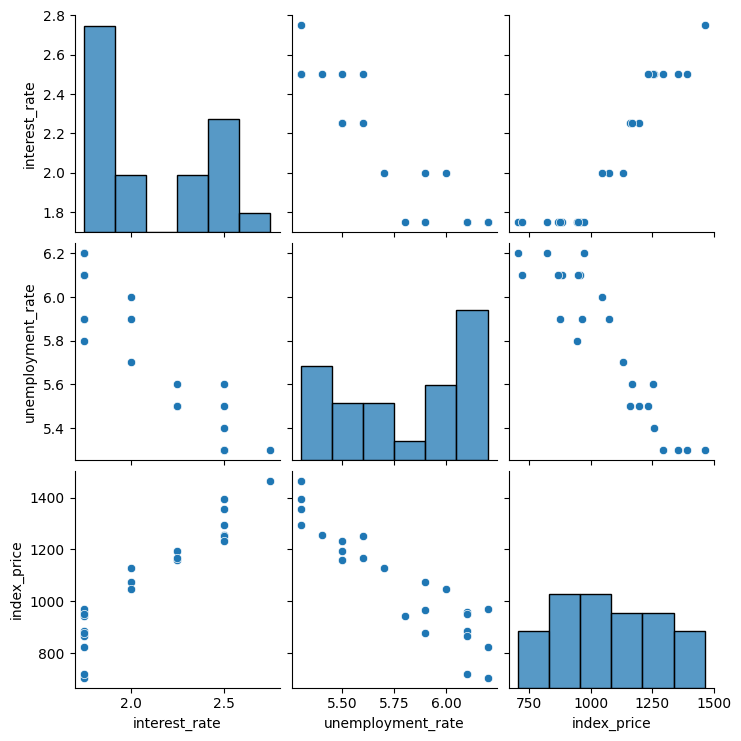

In [6]:
import seaborn as sns

sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

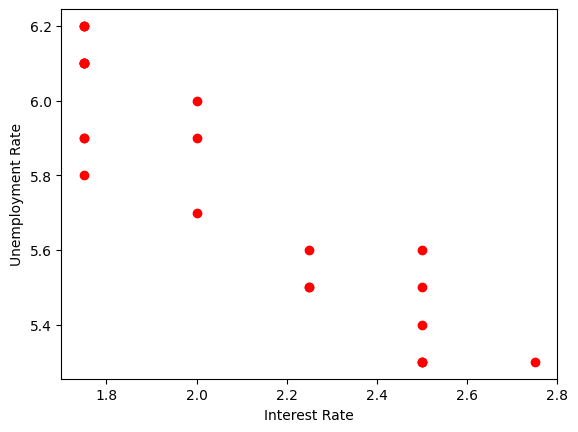

In [8]:
## Visual - more closly
plt.scatter(df_index["interest_rate"], df_index["unemployment_rate"], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [9]:
# Dependent and Independent Features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [10]:
X.head(),y

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [19]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

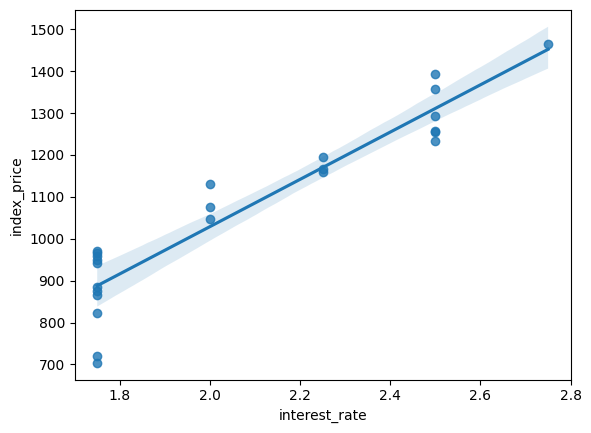

In [20]:
import seaborn as sns

sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

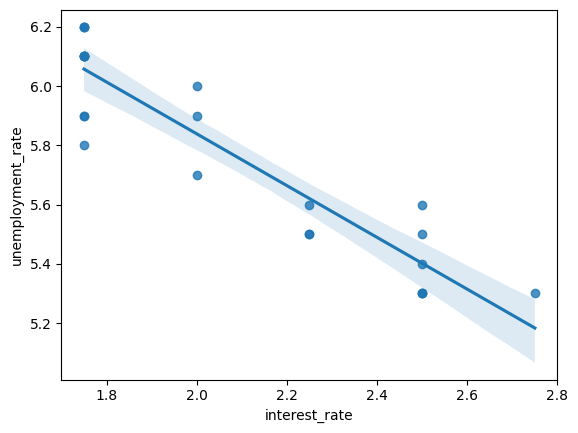

In [21]:
sns.regplot(x=df_index['interest_rate'],y=df_index["unemployment_rate"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

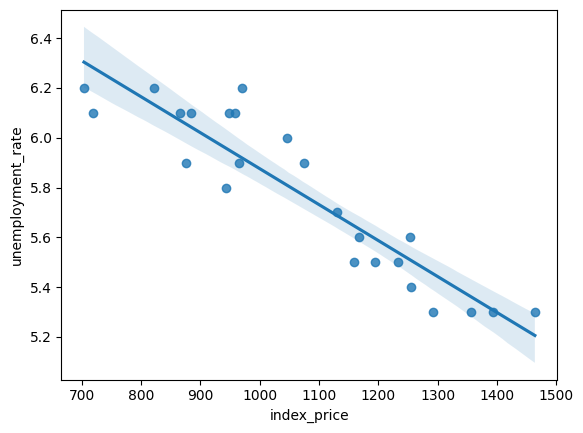

In [22]:
sns.regplot(x=df_index["index_price"],y=df_index["unemployment_rate"])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train, X_test

(array([[-0.90115511,  0.37908503],
        [ 1.31077107, -1.48187786],
        [-0.90115511,  1.30956648],
        [ 1.31077107, -0.55139641],
        [ 1.31077107, -1.48187786],
        [-0.16384638,  0.68924552],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -1.48187786],
        [ 1.31077107, -1.17171738],
        [-0.90115511,  1.30956648],
        [-0.90115511,  0.999406  ],
        [-0.90115511,  0.37908503],
        [-0.90115511,  0.999406  ],
        [ 0.57346234, -0.8615569 ],
        [-0.16384638, -0.24123593],
        [-0.90115511,  0.06892455],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -0.8615569 ]]),
 array([[ 0.36115756, -0.82078268],
        [-1.08347268,  1.33377186],
        [ 1.8057878 , -1.43636969],
        [-1.08347268,  1.02597835],
        [-0.36115756,  0.41039134],
        [ 0.36115756, -0.51298918]]))

In [25]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error",
                                   cv=3)
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [29]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [30]:
# Prediction
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [31]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rsme = np.sqrt(mse)

mse, mae, rsme

(8108.567426306604, 73.80444932337097, np.float64(90.04758423359621))

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

# Display adjusted
print(1 - ( 1 - score) * ( len(y_test)-1) / (len(y_test)-X_test.shape[1]-1) )

0.7591371539010257
0.5985619231683761


# Assumptions

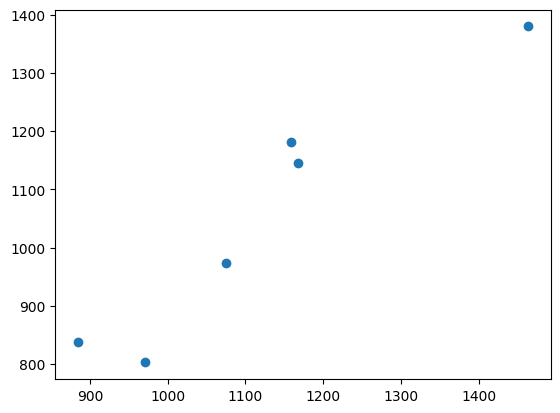

In [34]:
plt.scatter(y_test, y_pred)

In [35]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


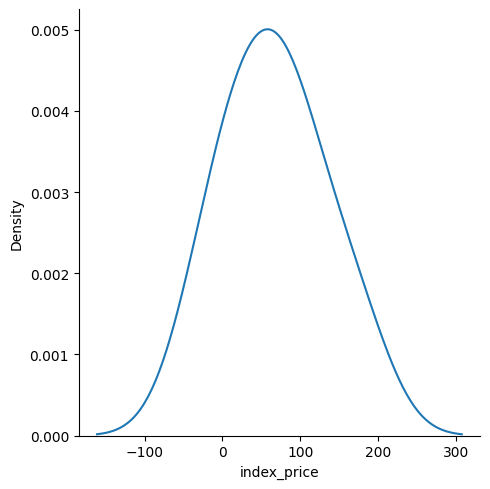

In [36]:
## Plot this residuals
sns.displot(residuals, kind='kde')

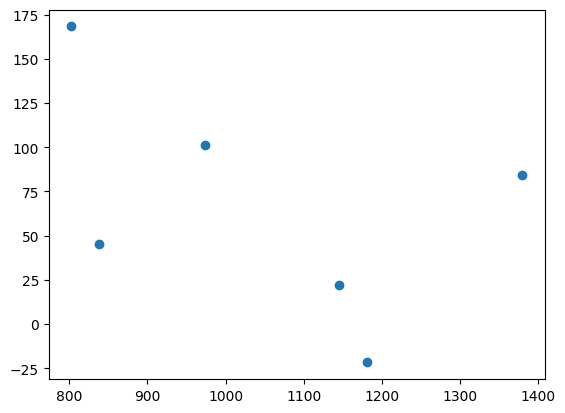

In [ ]:
## Scatter plot respect to prediction and residuals
plt.scatter(y_pred, residuals)
# Should be uniformly distributted

In [38]:
## OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [39]:
model.summary()

e:\GitHub\Python\Python_DataScience\ai-ml-practice\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 30 Jul 2025   Prob (F-statistic):                       0.754
Time:                        22:41:40   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
regression.coef_

array([  88.27275507, -116.25716066])